# Análise de dados

## Estrutura do notebook

[1. Importação das bibliotecas](#1.-Importa%C3%A7%C3%A3o-das-bibliotecas)<br>
[2. Informações da amostra](#2.-Informa%C3%A7%C3%B5es-da-base)<br>
[3. Escolhendo e tratando colunas](#3.-Escolhendo-e-tratando-colunas-desejadas)<br>
[4. Obtendo informações através de gráficos](#4.-Obtendo-informa%C3%A7%C3%B5es-atraves-de-graficos)<br>
[5. Juntanto colunas em único gráfico](#5.-Juntanto-colunas-em-%C3%BAnico-gr%C3%A1fico)<br>
[6. Gráfico final](#6.-Gr%C3%A1fico-final)<br>
[7. Dicionário](#7.-Dicion%C3%A1rio)<br>
[8. Fontes](#7.-Fontes)

### 1. Importação das bibliotecas

In [1]:
import pandas as pd
import pyspark.sql.functions as F
from pyspark.sql.types import *
from pyspark.sql import Window

### 2. Informações da base

In [3]:
#Leitura da base
df = spark.read.csv('/home/tatiane/Downloads/CURSO_BIGDATA/titanic.csv', sep = ',', header = True)

In [4]:
#Conferindo se o separador e o cabeçalho estáo corretos
df.limit(10).toPandas()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,None,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,None,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,None,S
5,6,0,3,"Moran, Mr. James",male,None,0,0,330877,8.4583,None,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.075,None,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,None,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,None,C


In [5]:
#Coletando informações das colunas
df.printSchema()

root
 |-- PassengerId: string (nullable = true)
 |-- Survived: string (nullable = true)
 |-- Pclass: string (nullable = true)
 |-- Name: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Age: string (nullable = true)
 |-- SibSp: string (nullable = true)
 |-- Parch: string (nullable = true)
 |-- Ticket: string (nullable = true)
 |-- Fare: string (nullable = true)
 |-- Cabin: string (nullable = true)
 |-- Embarked: string (nullable = true)



In [6]:
#Quantidade de registros
df.count()

891

In [7]:
#Quantidade de colunas
len(df.columns)

12

### 3. Escolhendo e tratando colunas desejadas

### 3.1. Selecionando as colunas desejadas e transformando em um novo dataFrame

In [22]:
new_df = df.select('Survived', 'Pclass', 'Sex', 'Age', 'Embarked')

In [23]:
new_df.show(3)

+--------+------+------+---+--------+
|Survived|Pclass|   Sex|Age|Embarked|
+--------+------+------+---+--------+
|       0|     3|  male| 22|       S|
|       1|     1|female| 38|       C|
|       1|     3|female| 26|       S|
+--------+------+------+---+--------+
only showing top 3 rows



### 3.2. Renomeando as informações das colunas

In [24]:
new_df = new_df.withColumn('Survived', F.when(F.col('Survived') == 0, 'Não')
                   .when(F.col('Survived') == 1, 'Sim'))

In [25]:
new_df = new_df.withColumn('Embarked', F.when(F.col('Embarked') == 'S', 'Southampton')
                   .when(F.col('Embarked') == 'C', 'Cherbourg')
                   .when(F.col('Embarked') == 'Q', 'Queenstown'))

In [26]:
new_df.limit(5).toPandas()

,Survived,Pclass,Sex,Age,Embarked
0,Não,3,male,22,Southampton
1,Sim,1,female,38,Cherbourg
2,Sim,3,female,26,Southampton
3,Sim,1,female,35,Southampton
4,Não,3,male,35,Southampton


### 4. Obtendo informações atraves de graficos

<AxesSubplot:xlabel='Survived'>

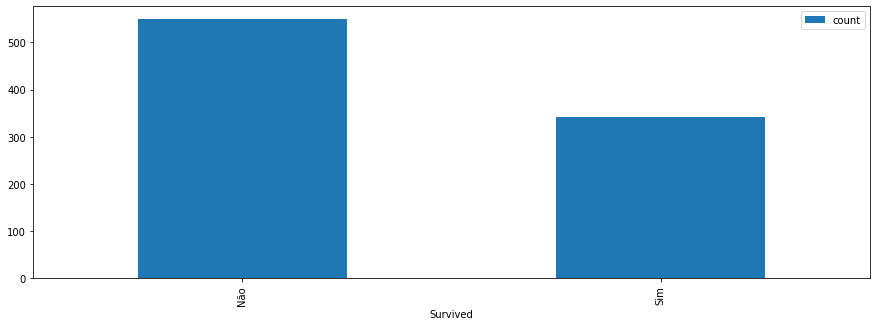

In [29]:
#Com relação a variável 'survived'
sobreviventes = new_df.groupBy('Survived').count().toPandas()
sobreviventes.plot(figsize=(15, 5), kind='bar', x='Survived')

<AxesSubplot:xlabel='Pclass'>

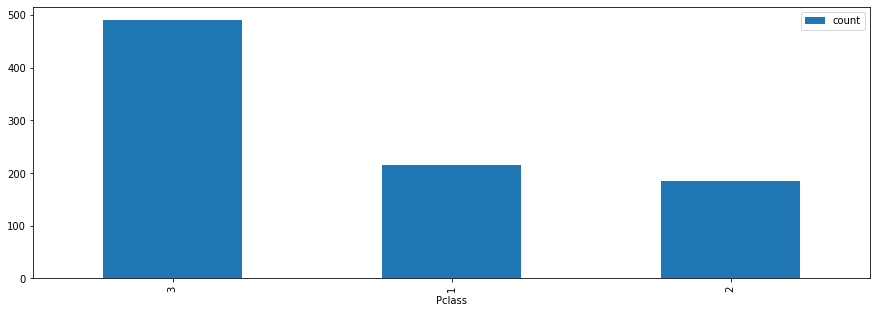

In [30]:
#Com relação a variável 'Pclass'
classe = new_df.groupBy('Pclass').count().toPandas()
classe.plot(figsize=(15, 5), kind='bar', x='Pclass')

<AxesSubplot:xlabel='Sex'>

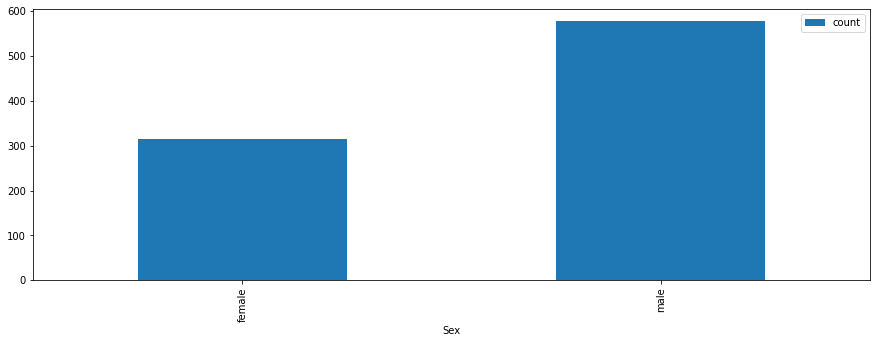

In [31]:
#Com relação a variável 'Sex'
sexo = new_df.groupBy('Sex').count().toPandas()
sexo.plot(figsize=(15, 5), kind='bar', x='Sex')

In [35]:
#Com relação a variável 'Age'; Aqui transformei a variavel em Inteira, pois tinham idades como 20.3, 12.1 e assim por diante.
new_df = new_df.withColumn('Age', F.col('Age').cast(IntegerType()))

<AxesSubplot:xlabel='Age'>

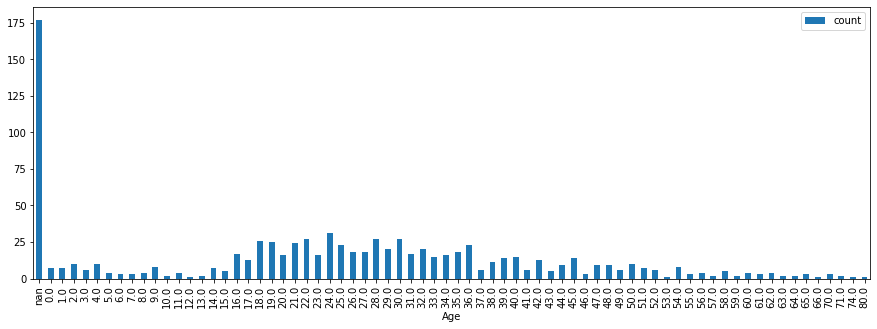

In [36]:
idade = new_df.groupBy('Age').count().orderBy('Age').toPandas()
idade.plot(figsize=(15, 5), kind='bar', x='Age')

<AxesSubplot:xlabel='Embarked'>

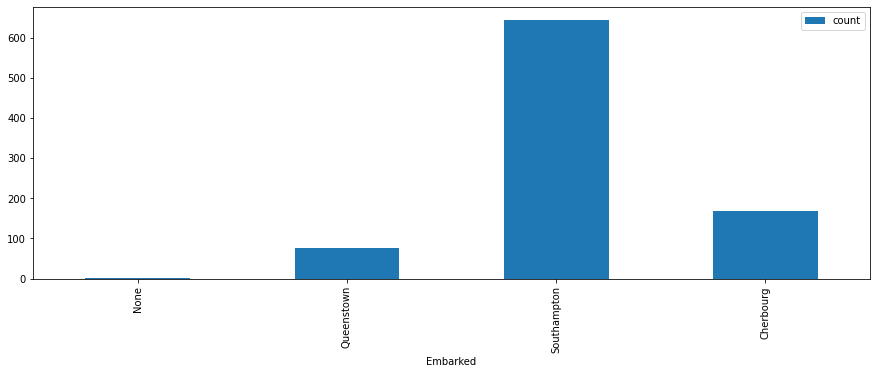

In [34]:
#Com relação a variável 'Embarked'
embarcacao = new_df.groupBy('Embarked').count().toPandas()
embarcacao.plot(figsize=(15, 5), kind='bar', x='Embarked')

### 5. Juntanto colunas em único gráfico

In [ ]:
from pyspark.sql import SQLContext
sqlContext = SQLContext(sc)

import plotly.graph_objs as go
import requests
requests.packages.urllib3.disable_warnings()

<AxesSubplot:xlabel='Survived'>

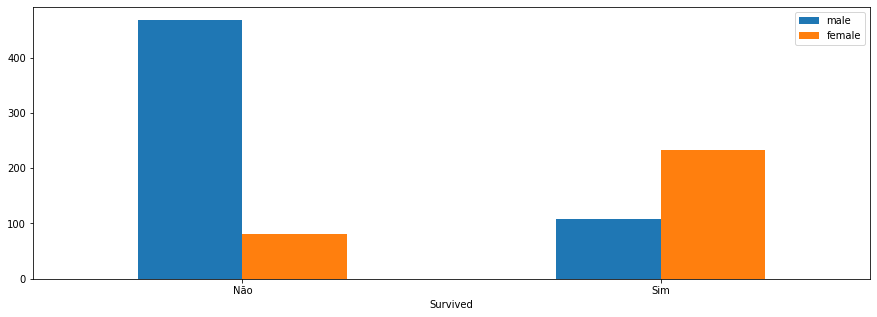

In [37]:
pivotDF = new_df.groupBy("Survived").pivot("Sex").count().toPandas()
pivotDF.plot(figsize=(15, 5), kind='bar', x='Survived', rot = 0, #stacked=True, barh 
                  y=['male', 'female'])

In [38]:
pivotDF = new_df.groupBy("Survived").pivot("Sex").count().toPandas()
pivotDF

,Survived,female,male
0,Não,81,468
1,Sim,233,109


<AxesSubplot:xlabel='Survived'>

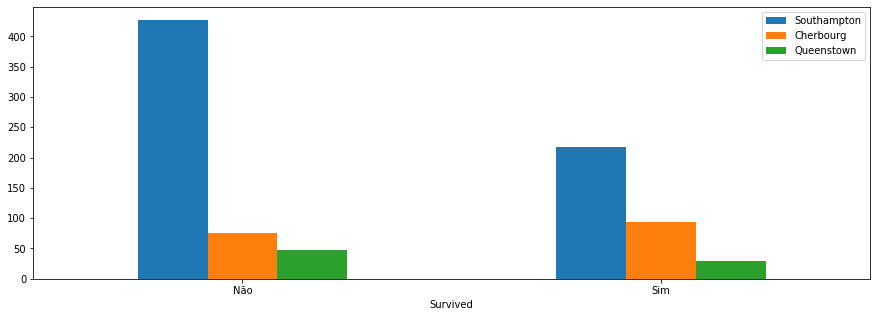

In [42]:
pivotDF = new_df.groupBy("Survived").pivot("Embarked").count().toPandas()
pivotDF.plot(figsize=(15, 5), kind='bar', x='Survived', rot = 0, #stacked=True, barh 
                  y=['Southampton', 'Cherbourg', 'Queenstown'])

In [43]:
pivotDF = new_df.groupBy("Survived").pivot("Embarked").count().toPandas()
pivotDF

,Survived,null,Cherbourg,Queenstown,Southampton
0,Não,NaN,75,47,427
1,Sim,2.0,93,30,217


In [61]:
#Conferindo as numerações
new_df.groupBy('Embarked').count().show()

+-----------+-----+
|   Embarked|count|
+-----------+-----+
|       null|    2|
| Queenstown|   77|
|Southampton|  644|
|  Cherbourg|  168|
+-----------+-----+



<AxesSubplot:xlabel='Survived'>

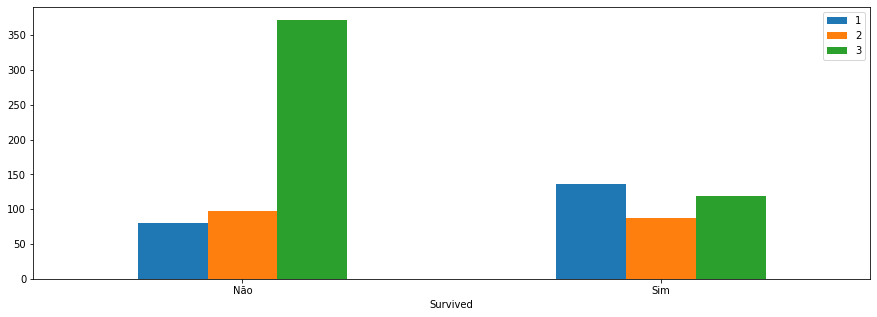

In [62]:
pivotDF = new_df.groupBy("Survived").pivot("Pclass").count().toPandas()
pivotDF.plot(figsize=(15, 5), kind='bar', x='Survived', rot = 0, #stacked=True, barh 
                  y=['1', '2', '3'])

In [63]:
pivotDF = new_df.groupBy("Survived").pivot("Pclass").count().toPandas()
pivotDF

,Survived,1,2,3
0,Não,80,97,372
1,Sim,136,87,119


### 6. Gráfico final

- https://stackoverflow.com/questions/53019588/function-object-has-no-attribute-plot
- https://www.ti-enxame.com/pt/python/matplotlib-plota-varias-colunas-do-quadro-de-dados-pandas-no-grafico-de-barras/829855323/

### 7. Dicionário

- https://sigmoidal.ai/data-science-titanic-python-1/

### 8. Fontes

- Refazendo análise da base que analisei na pasta referente ao Pandas;

    1. https://datamarte.com/desafio-titanic/#:~:text=Dicion%C3%A1rio%20dos%20dados,-Essa%20%C3%A9%20uma&text=pclass%20(Classe%20de%20ingresso%2C%201,Age%20(Idade)
    2. https://sigmoidal.ai/data-science-titanic-python-1/
    3. https://medium.com/marciojesus/investigando-o-naufr%C3%A1gio-do-titanic-b478c7750d31
    4. https://github.com/stacktecnologias/stack-repo/blob/master/Pandas_Live.ipynb